In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error, r2_score
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['train.csv', 'sample_submission.csv', 'test.csv', 'data_description.txt']


In [2]:
df_train = pd.read_csv("../input/train.csv",index_col=False )
df_test = pd.read_csv('../input/test.csv',index_col=False )
df_ss=pd.read_csv('../input/sample_submission.csv',index_col=False )

display(df_train.head(5))
display(df_ss.head(5))

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


,Id,SalePrice
0,1461,169277.052498
1,1462,187758.393989
2,1463,183583.683570
3,1464,179317.477511
4,1465,150730.079977


In [3]:
missing_value = df_train.isnull().sum().sort_values(ascending=False)
percent = (df_train.isnull().sum()/df_train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([missing_value, percent], axis=1, keys=['missCount', 'Percent'])
missing_data.head(25)

,missCount,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageCond,81,0.055479
GarageType,81,0.055479
GarageYrBlt,81,0.055479
GarageFinish,81,0.055479


In [4]:
#deleting the column which has Null values
delete_column = []
for i in range(len(missing_data['Percent'].index)):
    if(missing_data['missCount'][i]>0):
        delete_column.append(missing_data['Percent'].index[i])
df_train_X= df_train.drop(columns=delete_column,axis=1)
print("{} Column's are dropped ".format(delete_column))

['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu', 'LotFrontage', 'GarageCond', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'BsmtExposure', 'BsmtFinType2', 'BsmtFinType1', 'BsmtCond', 'BsmtQual', 'MasVnrArea', 'MasVnrType', 'Electrical'] Column's are dropped 


In [5]:
num_col_names = list(df_train._get_numeric_data().columns.values)
other_col_names = list(df_train.columns.values)
print("There are {}  Numerical columns \nThere are {} categorical columns".format(len(num_col_names),(len(other_col_names)-len(num_col_names))))

There are 38  Numerical columns 
There are 43 categorical columns


In [6]:
cat_num=dict()
for column in df_train_X:
    if column == "SalePrice":
        cat_num[column]=False
    else:
        if(df_train_X[column].dtypes == object):
            df_train_X[column]  = df_train_X[column] .astype('category')
            df_train_X[column] = df_train_X[column].cat.codes
            cat_num[column]=True
            print("converted column {} to numerical".format(column))
        else:
            cat_num[column]=False

converted column MSZoning to numerical
converted column Street to numerical
converted column LotShape to numerical
converted column LandContour to numerical
converted column Utilities to numerical
converted column LotConfig to numerical
converted column LandSlope to numerical
converted column Neighborhood to numerical
converted column Condition1 to numerical
converted column Condition2 to numerical
converted column BldgType to numerical
converted column HouseStyle to numerical
converted column RoofStyle to numerical
converted column RoofMatl to numerical
converted column Exterior1st to numerical
converted column Exterior2nd to numerical
converted column ExterQual to numerical
converted column ExterCond to numerical
converted column Foundation to numerical
converted column Heating to numerical
converted column HeatingQC to numerical
converted column CentralAir to numerical
converted column KitchenQual to numerical
converted column Functional to numerical
converted column PavedDrive to n

In [7]:
unique = df_train['MSSubClass'].unique()
display(unique)
print("The shape of the training data set is {}".format(df_train.shape))

array([ 60,  20,  70,  50, 190,  45,  90, 120,  30,  85,  80, 160,  75,
       180,  40])

The shape of the training data set is (1460, 81)


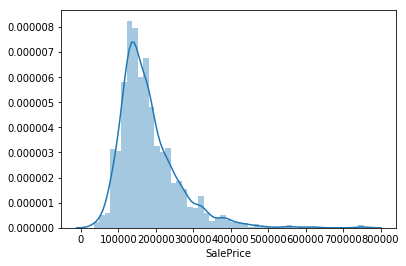

In [8]:
sns.distplot(df_train['SalePrice']);

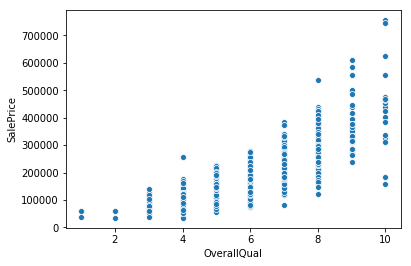

In [9]:
sns.scatterplot(x="OverallQual", y="SalePrice", data=df_train)

In [10]:
training,test = train_test_split(df_train_X, train_size = 0.7, test_size = 0.3, shuffle=True)
training_label = training.pop('SalePrice')
test_label = test.pop('SalePrice')

In [11]:
clf =LinearRegression()

clf.fit(training,training_label)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [12]:
prediction = clf.predict(test)

In [13]:
print("The RMSE value is {}".format(r2_score(test_label,prediction)))

The RMSE value is 0.8008791220970537


In [14]:
# See our Squared Mean Error score and Root Mean Squared Error:
test_mse = mean_squared_error(test_label, prediction)
test_rmse = np.sqrt(test_mse)
# See our Mean Absolute Error
test_mae = mean_absolute_error(test_label, prediction)
print(test_mae)

20392.49185974122


In [15]:
from sklearn.model_selection import cross_val_score,cross_val_predict
cv_4_results = cross_val_score(clf, test, test_label, cv=4,)
cross_val_pred = cross_val_predict(clf,test,test_label,cv=4)
print(cv_4_results)

[0.73489579 0.76733158 0.5348817  0.81088115]


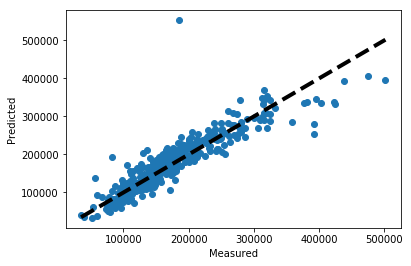

In [16]:
fig, ax = plt.subplots()
ax.scatter(test_label, prediction)
ax.plot([test_label.min(), test_label.max()], [test_label.min(), test_label.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()